#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>


---
# Libraries

In [12]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

---
# Reading the Dataset


In [13]:
data = pd.read_csv(r'C:\Users\acer\Desktop\DS\Deep Learning\CAPSTONE\heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0



---
# 1. Exploratory Data Analysis
---

In [16]:
# let us look at the data types and counts of respective columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- The dataset doesn't have **'null'** values.

In [18]:
# let us look at the statistical parameters
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Correlation Matrix

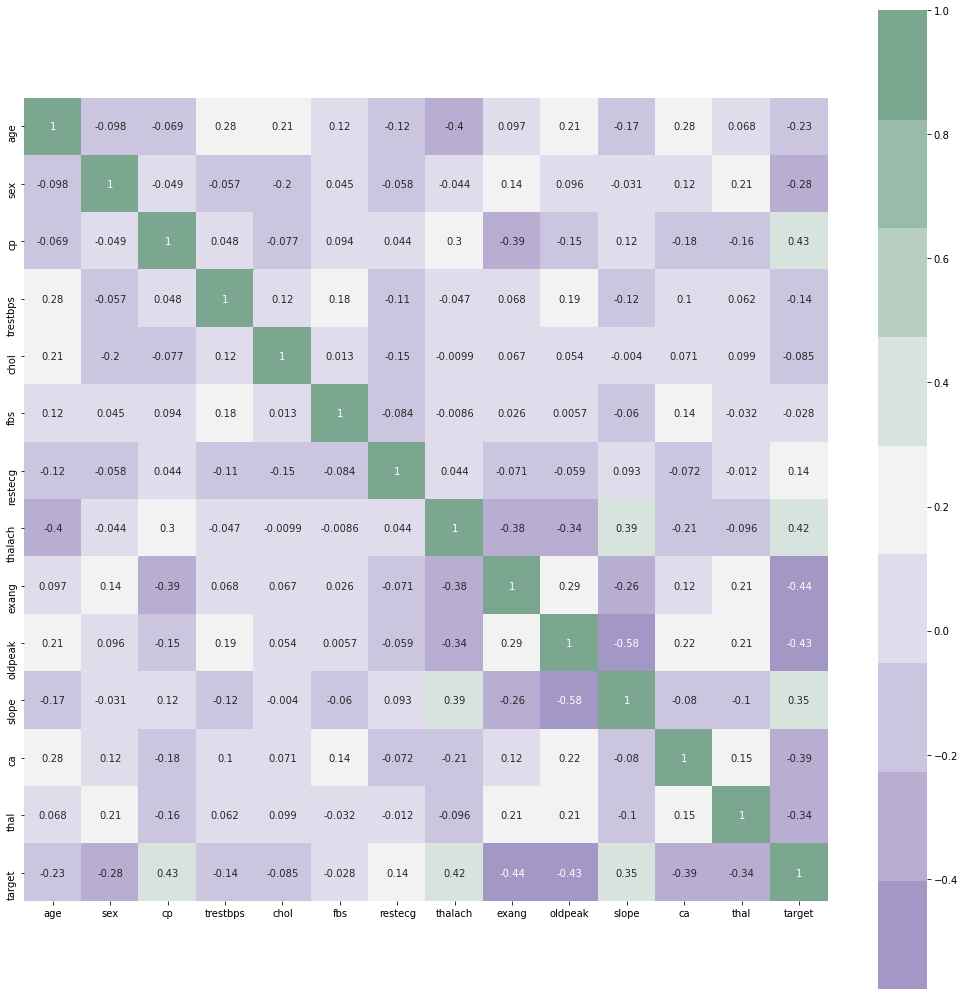

In [19]:
#Examining a correlation matrix of all the features
cmap = sns.diverging_palette(275,150, s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

- **Slope** and **oldpeak** have some correlation. Besides this no other features show any kind of major correlations.
- **exang**, **oldpeak**, **cp**, **thalach** and **thal** show fair amount of correlation with the target variable and hence can affect the outcomes of the model.

## Target column

In [22]:
# looking at the target column
data['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# finding the respective counts for the classes 
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

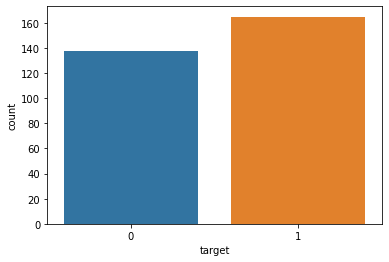

In [21]:
# visualising the balance of the class
sns.countplot(data = data, x = 'target')

- The target class has 2 values (**0** and **1**).
- The class is slightly imbalanced, however it can be tackled with the help of over-sampling and under-sampling.
- Since the imbalance is not much hence no need for balancing. Will procede to the next step.

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- We are done with EDA and now we will move ahead with the **train-test split** and **model buiding**.

---
# 2. Train-Test split

In [24]:
# defining X and y (X representing all the features and y the target column)
X = data.iloc[:,:-1]
y = data['target']

In [25]:
# importing train test split from sklearn librabry
from sklearn.model_selection import train_test_split

# Spliting our data in 80-20 ratio where 80 is train data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 100)

In [26]:
# training data
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2


In [30]:
# test data
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [32]:
y_train.head()

184    0
19     1
118    1
41     1
59     1
Name: target, dtype: int64

In [33]:
y_test.head()

69     1
300    0
220    0
134    1
7      1
Name: target, dtype: int64

- **Since the data is of varying range, we need to scale it down to a standard scale before building it.**

# Scaling Data
## Standardisation

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                               # defining a object first
X_scaled = scaler.fit_transform(X_train)                # fitting and transforming the data 

# Scaling the train data
cols = X.columns
X_train_S = pd.DataFrame(X_scaled, columns = cols)      # creating a new dataframe of our scaled data
X_train_S

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.497803,0.689645,-0.964689,1.044239,-0.083717,-0.390360,-1.001026,-0.979764,-0.68313,1.391297,-0.709199,-0.718858,1.158151
1,1.647367,-1.450022,1.870794,0.462638,-0.165905,-0.390360,0.936960,0.048785,-0.68313,0.693305,0.957074,1.292282,-0.550828
2,-0.949417,-1.450022,-0.019528,-1.572968,-0.885052,-0.390360,0.936960,0.987895,-0.68313,-0.877177,0.957074,-0.718858,-0.550828
3,-0.723610,0.689645,-0.019528,-0.118964,-0.042622,-0.390360,-1.001026,1.345651,-0.68313,-0.702679,-0.709199,-0.718858,-0.550828
4,0.292523,-1.450022,-0.964689,-0.235284,1.149107,-0.390360,-1.001026,0.406541,-0.68313,-0.877177,0.957074,0.286712,-0.550828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-0.384899,0.689645,0.925633,-1.863769,-0.515205,-0.390360,0.936960,-0.308971,1.46385,0.169811,-0.709199,-0.718858,-0.550828
238,-1.175225,-1.450022,0.925633,-1.398488,-2.179517,-0.390360,0.936960,1.122053,-0.68313,-0.353683,-0.709199,-0.718858,-0.550828
239,0.405427,0.689645,0.925633,-1.572968,-0.145358,-0.390360,-1.001026,0.182943,1.46385,-0.353683,-0.709199,-0.718858,1.158151
240,-1.401032,0.689645,-0.964689,0.229997,1.395672,-0.390360,0.936960,-1.113922,1.46385,0.693305,-0.709199,-0.718858,-2.259806


In [43]:
# Scaled test data
X_test_scaled = scaler.fit_transform(X_test)
X_test_S = pd.DataFrame(X_test_scaled, columns = cols)
X_test_S

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.791859,-1.545603,-0.856268,-0.319700,-0.545913,-0.520416,0.765368,0.581676,-0.751068,-0.979658,1.065715,-0.703906,-0.395670
1,1.400725,0.646997,-0.856268,0.754773,-0.802443,1.921538,0.765368,-0.307400,-0.751068,1.854109,-0.446113,1.085189,1.024087
2,0.893336,-1.545603,-0.856268,1.077115,2.628637,-0.520416,-1.030303,0.217963,-0.751068,2.354185,-0.446113,1.979736,1.024087
3,-1.339173,-1.545603,0.279218,-0.212252,1.009296,-0.520416,0.765368,0.581676,-0.751068,-0.979658,1.065715,-0.703906,-0.395670
4,-1.034740,0.646997,0.279218,-0.534594,0.319873,-0.520416,0.765368,0.985801,-0.751068,-0.979658,1.065715,-0.703906,1.024087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-1.745084,0.646997,1.414704,0.002642,0.111443,-0.520416,0.765368,1.551577,-0.751068,1.937455,-1.957942,-0.703906,-0.395670
57,0.690381,0.646997,1.414704,1.077115,-0.000789,1.921538,0.765368,-0.469051,1.331438,-0.146197,-0.446113,-0.703906,-0.395670
58,-0.628829,0.646997,-0.856268,-0.427147,-0.337483,-0.520416,-1.030303,1.511165,-0.751068,-0.979658,1.065715,-0.703906,-0.395670
59,0.081515,-1.545603,0.279218,0.271260,0.111443,-0.520416,-1.030303,0.500851,-0.751068,0.187187,-0.446113,-0.703906,-0.395670


# 3. Model Building and Training

In [54]:
early_stopping = callbacks.EarlyStopping(
 min_delta=0.001, # minimium amount of change to count as an improvement
 patience=20, # how many epochs to wait before stopping
 restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
#ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to pr
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train_S, y_train, batch_size = 12, epochs = 300,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/300
17/17 [==============================] - 1s 29ms/step - loss: 0.6929 - accuracy: 0.5389 - val_loss: 0.6926 - val_accuracy: 0.5510
Epoch 2/300
17/17 [==============================] - 0s 11ms/step - loss: 0.6921 - accuracy: 0.5699 - val_loss: 0.6921 - val_accuracy: 0.5510
Epoch 3/300
17/17 [==============================] - 0s 11ms/step - loss: 0.6914 - accuracy: 0.5699 - val_loss: 0.6909 - val_accuracy: 0.5510
Epoch 4/300
17/17 [==============================] - 0s 12ms/step - loss: 0.6887 - accuracy: 0.5699 - val_loss: 0.6880 - val_accuracy: 0.5510
Epoch 5/300
17/17 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.5699 - val_loss: 0.6808 - val_accuracy: 0.5510
Epoch 6/300
17/17 [==============================] - 0s 20ms/step - loss: 0.6716 - accuracy: 0.5699 - val_loss: 0.6652 - val_accuracy: 0.5510
Epoch 7/300
17/17 [==============================] - 0s 7ms/step - loss: 0.6483 - accuracy: 0.5699 - val_loss: 0.6384 - val_accuracy: 0.5510
Epoch 8/

---
# 4. Model Evaluation
## Train Accuracy

In [67]:
# calculating the mean train and validation accuracies
train_accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])

print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy*100))


train_accuracy: 84.59%
val_accuracy: 82.20%


- The training and validation accuracies are nearly similiar leading to the conclusion that our model is **not overfitting**.

---
## Plotting the train and validation loss

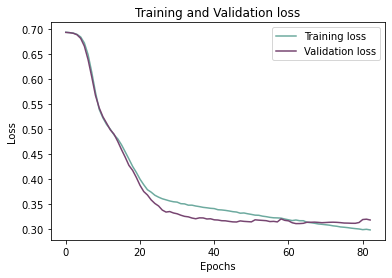

In [56]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

- We can see that the error down rate is almost equal.

## Plotting the train and validation accuracies

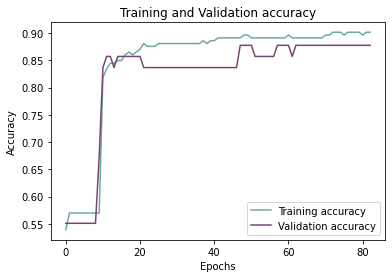

In [57]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- From the plot above, we can see that the validation accuracy is nearly equal to the training accuracy.

---
## Predicting with Test data

In [58]:
# using predict func to predict the test data
y_pred = model.predict(X_test_S)
y_pred = (y_pred > 0.5)                    # taking theshold as 0.5

2/2 [==============================] - 0s 4ms/step


---
## Confusion Matrix

In [59]:
# comparing test and predict results to plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[24,  9],
       [ 2, 26]], dtype=int64)

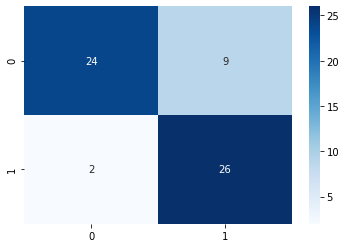

In [64]:
# visualising the confusion matrix using heatmap
sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

---
## Classification report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



---
## Test Accuracy

In [69]:
round(accuracy_score(y_test, y_pred),4)       # calling accuracy_score to calculate the accuracy

0.8197

- The test accuracy is **~82%** which is closer to our training accuracy (**~85%**) hence we can say that our model is generalising well with the new data. 

---
# Conclusion

- We began with a dataset containing info about heart desease. 
- Our task was to create a model that can predict whether a patient has heart problems or not.
- After cleaning and doing statistical analysis of the data, we split the data into train and test.
- Applied standard scaler to scale our data and then build the layers using sequencial function.
- Then build the model and calculated the train and validation accuracy to make sure our model is generalised well.
- Lastly made predictions using the test data and calculated the confusion matrix, classification report etc.  


---
# Findings

- Our data was free of null values and had tolerable outliers.
- Classes were fairly balanced therefore avoided sampling techniques.
- While building the model we found that our model had overfitted and hence training data was increased by re spliting the data increasing the number of the train samples.
- Overfitting was succesfully dealt with.
- Then made predictions using test data and the accuracy came out to be closer to train accuracy.
- Hence we were able to make a good model.